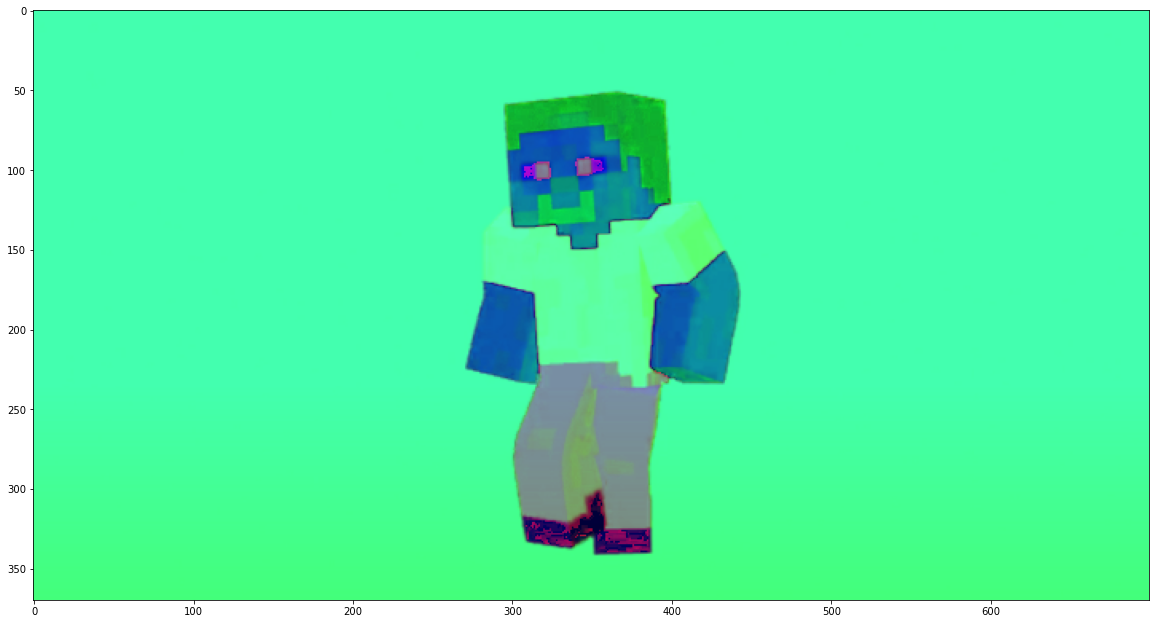

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('greenscreen.png')
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

plt.figure(figsize=(20, 15))
plt.imshow(img)

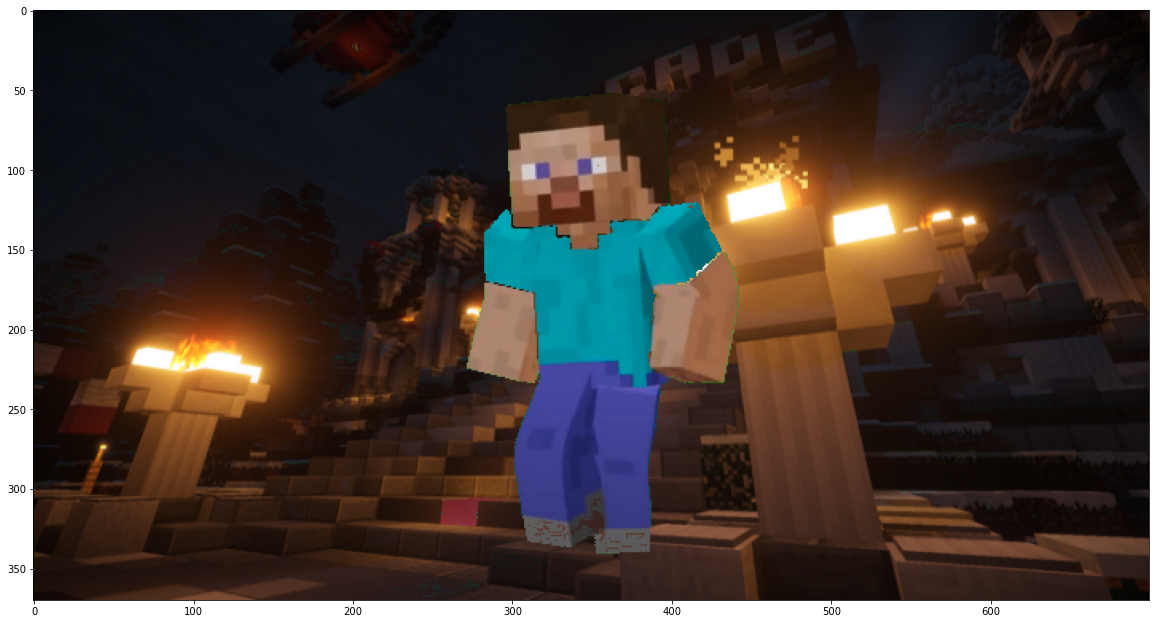

In [5]:
background = cv.imread('background.png')
background = cv.cvtColor(background, cv.COLOR_BGR2HSV)
background = cv.resize(background, (700, 370))
lower_g = np.array([50, 50, 50])
upper_g = np.array([90, 255, 255])

mask = cv.inRange(img, lower_g, upper_g)
res = cv.bitwise_and(img, img, mask = mask)

steve = img - res

steve_merged = np.where(steve == 0, background, steve)

steve_merged = cv.cvtColor(steve_merged, cv.COLOR_HSV2RGB)
plt.figure(figsize=(20, 15))
plt.imshow(steve_merged)

In [11]:
video = cv.VideoCapture(0)

while True:
    ret, frame = video.read()

    if not ret:
        break

    cv.imshow('Sample', frame)

    if cv.waitKey(30) == ord('q'):
        break

video.release()
cv.destroyAllWindows()
k = cv.waitKey(1)